In [ ]:
Regression with different basic functions

In [ ]:
Target:
- Try to use different basic functions to fit the model.
- At this case study, we intend to try RBF, Sigmoid, self-defined function to train the data
- Make comparisions between these different functions.

Text(0, 0.5, 't')

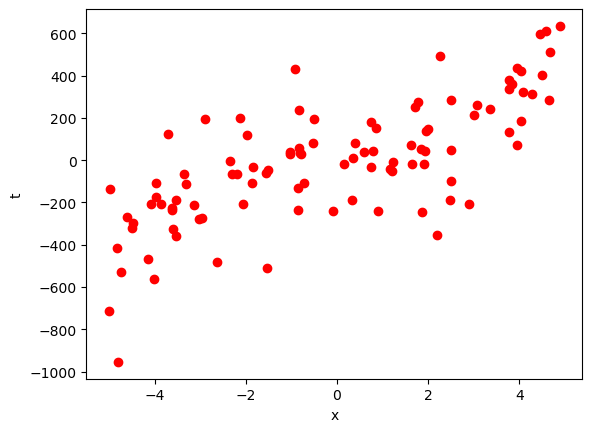

In [4]:
# load the data
import numpy as np
%matplotlib inline
import pylab as plt


np.random.seed(1) # fix random seed such that every time we get the same random numbers

N = 100 # total number of data points 
x = 10*np.random.rand(N,1) - 5 # generate random x
t = 5*x**3 - x**2 + x + 200*np.random.randn(N,1) # generate t according to the true model with additive noise
x_test = np.linspace(-5,5,100)[:,None] # generate x_test for plotting

plt.plot(x, t, 'ro')
plt.xlabel('x')
plt.ylabel('t')

In [ ]:
-Take a look of RBF strategy:
             H(x) = exp(-(x - center(x) )** 2 / 2 * width) # note:  (x - center(x) ) is the 
                                                           #Euclidean distance between x and center(x)

In [5]:
def make_rbf(x, center, width):  # again np.hstack is very helpful
    X = np.exp( -0.5*(x-center[0])**2/width) 
    for i in range (len(center))[1:]:
        X = np.hstack( (X,np.exp( -0.5*(x-center[i])**2/width)) )
    return(X)

In [ ]:
- We take the x as the center, width = 10 as width to see how it goes.

In [6]:
center = x
width = 10
X_rbf = make_rbf(x, center, width)
print(X_rbf.shape)

(100, 100)


In [ ]:
-Train the RBF model

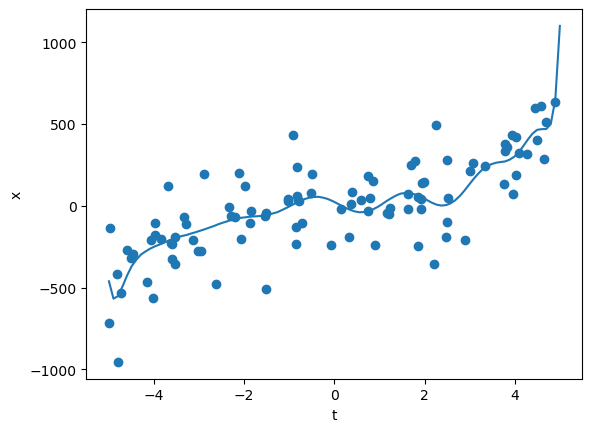

In [8]:
from sklearn.linear_model import LinearRegression
rbf_model = LinearRegression()
rbf_model.fit(X_rbf, t)

X_test = make_rbf(x_test, center, width)

plt.scatter(x,t) # draw a scatter plot
plt.xlabel('t') # always label x&y-axis
plt.ylabel('x') # always label x&y-axis

plt.plot(x_test, rbf_model.predict(X_test)) # we can see the model fits well in this case

In [ ]:
-Train Sigmoid model
        formula: h(x) = 1 / 1 + exp(-x) 
Notes:
The logistic function in linear regression is a type of sigmoid, a class of functions with the same specific properties.
    
Sigmoid is a mathematical function that takes any real number and maps it to a probability between 1 and 0.

In [16]:
def make_sig(x):  # again np.hstack is very helpful
    X = np.ones_like(x) 
    for i in range(len(x)- 1):
        X = np.hstack((X,1 / (1 + np.exp(-x))))
    return(X) 

In [17]:
X_sig = make_sig(x)
print(X_sig.shape)

(100, 100)


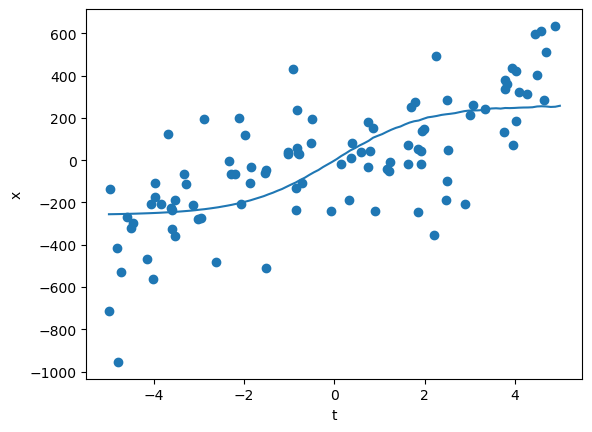

In [18]:
sig_model = LinearRegression()
sig_model.fit(X_sig, t)

X_test = make_sig(x_test)

plt.scatter(x,t) # draw a scatter plot
plt.xlabel('t') # always label x&y-axis
plt.ylabel('x') # always label x&y-axis

plt.plot(x_test, sig_model.predict(X_test)) # we can see the S shape model in this case study

In [ ]:
-Define our own function, at this time we try to combine the sigmoid and rbf models, the formula works as below:
            H(x) = f((x - center) ** 2 / width)
            f(a) = 1 / 1 + exp(-a)

In [34]:
def make_own_function(x, center, width):  # again np.hstack is very helpful
    X = np.exp((x-center[0])**2/width) 
    for i in range (len(center))[1:]:
        X = np.hstack( (X, (1 / 1 + np.exp(-x))))
    return(X)

In [35]:
center = x
width = 10
X_func = make_own_function(x, center, width)
print(X_func.shape)

(100, 100)


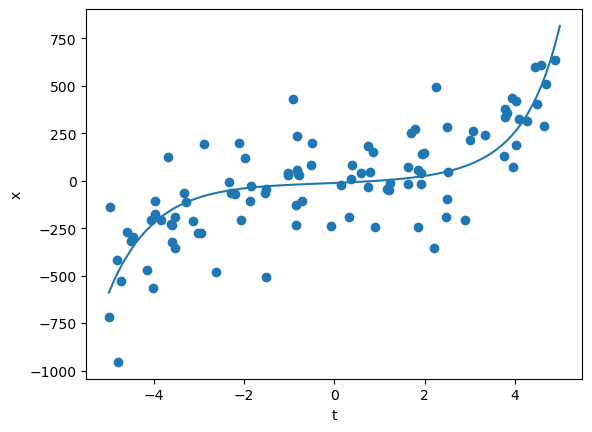

In [36]:
model = LinearRegression()
model.fit(X_func, t)

X_test = make_own_function(x_test, center, width)

plt.scatter(x,t) # draw a scatter plot
plt.xlabel('t') # always label x&y-axis
plt.ylabel('x') # always label x&y-axis

plt.plot(x_test, model.predict(X_test)) # we can see the new model here, it works pretty good for now.